In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
import hvplot.pandas
import requests


#import api key

from api_keys import geoapify_key

In [2]:
# Store filepath in a variable
OPTN_data = Path("Resources/cleaned_OPTN_data.csv")
state_data = Path("Resources/state_totals.csv")

# read the file - AP
kidney_data = pd.read_csv(OPTN_data)
state_totals = pd.read_csv(state_data)

kidney_data.head()


,State,Total,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years,Payment type,Blood type,Age,Ethnicity,Sex
0,Alabama,455,9,22,61,101,146,73,54,40,NaN,NaN,NaN,NaN,Female
1,Alabama,713,16,38,87,150,237,135,95,43,NaN,NaN,NaN,NaN,Male
2,Alabama,787,5,7,72,169,267,146,97,48,Public insurance - Medicare FFS (Fee for Service),NaN,NaN,NaN,NaN
3,Alabama,688,9,32,88,154,215,122,93,57,NaN,NaN,NaN,Black/Non-Hispanic,NaN
4,Alabama,631,14,30,80,136,209,124,81,46,NaN,O,NaN,NaN,NaN


In [3]:
#Define a function to replace commas and double quotes
def clean_value(value):
    if isinstance(value, str):
        # Remove commas and double quotes
        return value.replace(",", "").replace('"', '')
    return value

#Apply the function to each column
for column in kidney_data.columns:
    kidney_data[column] = kidney_data[column].apply(clean_value)

#Print the first five rows
print(kidney_data.head())

     State Total  < 30 days  30 to < 90 days  90 days to < 6 months  \
0  Alabama   455          9               22                     61   
1  Alabama   713         16               38                     87   
2  Alabama   787          5                7                     72   
3  Alabama   688          9               32                     88   
4  Alabama   631         14               30                     80   

  6 months to < 1 year 1 year to < 2 years 2 years to < 3 years  \
0                  101                 146                   73   
1                  150                 237                  135   
2                  169                 267                  146   
3                  154                 215                  122   
4                  136                 209                  124   

  3 years to < 5 years > 5 years  \
0                   54        40   
1                   95        43   
2                   97        48   
3                   93    

In [4]:
# need to type total and wait time columns as integers
kidney_data["Total"] = kidney_data["Total"].astype(int)
kidney_data["< 30 days"] = kidney_data["< 30 days"].astype(int)
kidney_data["30 to < 90 days"] = kidney_data["30 to < 90 days"].astype(int)
kidney_data["90 days to < 6 months"] = kidney_data["90 days to < 6 months"].astype(int)
kidney_data["6 months to < 1 year"] = kidney_data["6 months to < 1 year"].astype(int)
kidney_data["1 year to < 2 years"] = kidney_data["1 year to < 2 years"].astype(int)
kidney_data["2 years to < 3 years"] = kidney_data["2 years to < 3 years"].astype(int)
kidney_data["3 years to < 5 years"] = kidney_data["3 years to < 5 years"].astype(int)
kidney_data["> 5 years"] = kidney_data["> 5 years"].astype(int)

In [5]:
# Create a mapping for wait times to numerical values
wait_time_mapping = {
    "< 30 days": 15,
    "30 to < 90 days": 60,
    "90 days to < 6 months": 120,
    "6 months to < 1 year": 180,
    "1 year to < 2 years": 365,
    "2 years to < 3 years": 730,
    "3 years to < 5 years": 1460,
    "> 5 years": 2000
}

# Oklahoma

In [6]:
# Total candidates for Oklahoma

ok_totals1 = kidney_data.loc[kidney_data["State"] == "Oklahoma"]
ok_male_totals = ok_totals1.loc[ok_totals1["Sex"] == "Male"]["Total"].values[0]
ok_female_totals = ok_totals1.loc[ok_totals1["Sex"] == "Female"]["Total"].values[0]
ok_totals = ok_male_totals + ok_female_totals
ok_totals

597

## Wait time by blood type in Oklahoma

In [7]:
# Total for each blood type

ok_blood_type_O = ok_totals1.loc[ok_totals1["Blood type"] == "O"]["Total"].values[0]
ok_blood_type_A = ok_totals1.loc[ok_totals1["Blood type"] == "A"]["Total"].values[0]
ok_blood_type_B = ok_totals1.loc[ok_totals1["Blood type"] == "B"]["Total"].values[0]
ok_blood_type_AB = ok_totals1.loc[ok_totals1["Blood type"] == "AB"]["Total"].values[0]
print(ok_blood_type_O)
print(ok_blood_type_A)
print(ok_blood_type_B)
print(ok_blood_type_AB)

341
188
65
3


In [8]:
# OK blood type totals dataframe

ok_blood_type_totals = pd.DataFrame({"Blood type":["O", "A", "B", 
                                        "AB"], "Candidates":[ok_blood_type_O, ok_blood_type_A, ok_blood_type_B, 
                                                             ok_blood_type_AB]})
ok_blood_type_totals

,Blood type,Candidates
0,O,341
1,A,188
2,B,65
3,AB,3


In [9]:
# Hypothesis testing

# Assuming even distribution of people amongst blood types - mean of 149
# Degree of freedom is 4-1 = 3
# p-value = 0.05
# Reset index to blood type

ok_blood_type_totals["Expected"] = 149.25

ok_blood_type_totals.set_index("Blood type")

critical_value = stats.chi2.ppf(q = 0.95, df = 3)
print(critical_value)


7.814727903251179


In [10]:
# Null hypothesis is that number of candidates is evenly distributed amongst blood types

stats.chisquare(ok_blood_type_totals['Candidates'], ok_blood_type_totals['Expected'])

Power_divergenceResult(statistic=447.2814070351759, pvalue=1.2655367084022157e-96)

In [11]:
# Creating blood type vs wait time dataframe

ok_blood_type_wait = pd.DataFrame(ok_totals1[["Blood type","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_blood_type_wait

,Blood type,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1030,O,16,24,39,64,82,70,48,15
1034,A,14,15,21,46,47,25,15,7
1041,B,3,9,7,13,13,8,9,5
1051,AB,0,0,1,0,1,1,0,0


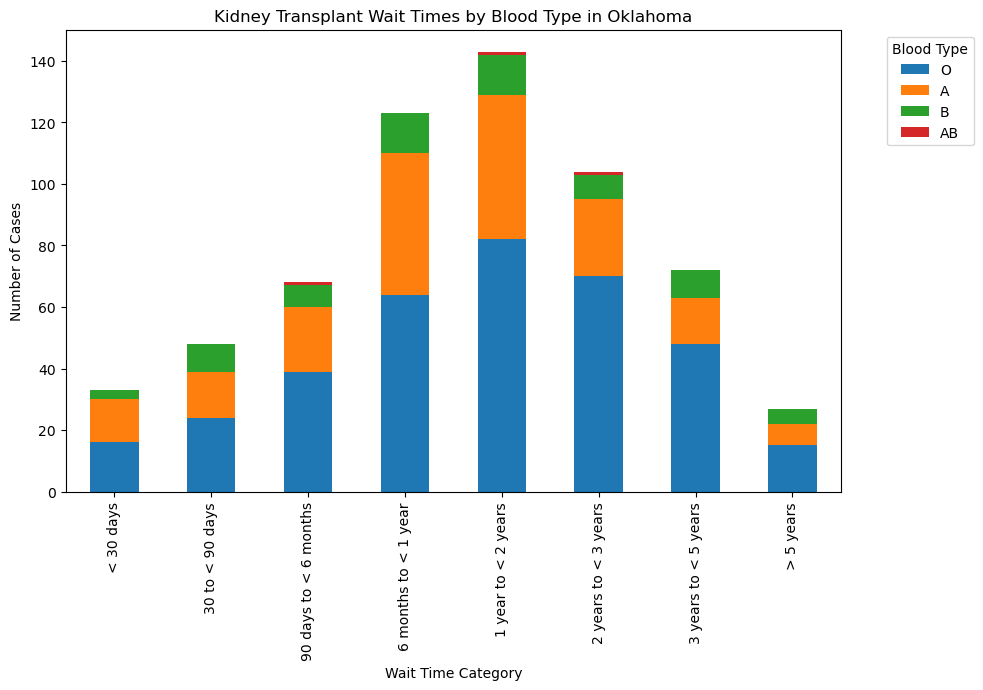

In [12]:
# Plot above on bar chart

# Set Blood type as the index
ok_blood_data = ok_blood_type_wait.set_index("Blood type")

# Transpose the DataFrame for easier plotting: https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php
ok_blood_data = ok_blood_data.transpose()

# Plot the bar chart
ok_blood_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Blood Type in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Blood Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [13]:
# Dataframes for each blood type with wait times

# Used the following code to identify the number values assigned to each wait time for each blood type:
#ok_blood_type_O_df = ok_blood_type_wait.loc[ok_blood_type_wait["Blood type"] == "O"].transpose().reset_index()
#ok_blood_type_O_df


ok_blood_type_O_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[16, 24, 39, 64, 82, 70, 48, 15]})
print(ok_blood_type_O_df)
print("")

ok_blood_type_A_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[14, 15, 21, 46, 47, 25, 15, 7]})
print(ok_blood_type_A_df)
print("")

ok_blood_type_B_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[3, 9, 7, 13, 13, 8, 9, 5]})
print(ok_blood_type_B_df)
print("")

ok_blood_type_AB_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[0, 0, 1, 0, 1, 1, 0, 0]})

print(ok_blood_type_AB_df)
print("")

               Wait time  Candidates
0              < 30 days          16
1        30 to < 90 days          24
2  90 days to < 6 months          39
3   6 months to < 1 year          64
4    1 year to < 2 years          82
5   2 years to < 3 years          70
6   3 years to < 5 years          48
7              > 5 years          15

               Wait time  Candidates
0              < 30 days          14
1        30 to < 90 days          15
2  90 days to < 6 months          21
3   6 months to < 1 year          46
4    1 year to < 2 years          47
5   2 years to < 3 years          25
6   3 years to < 5 years          15
7              > 5 years           7

               Wait time  Candidates
0              < 30 days           3
1        30 to < 90 days           9
2  90 days to < 6 months           7
3   6 months to < 1 year          13
4    1 year to < 2 years          13
5   2 years to < 3 years           8
6   3 years to < 5 years           9
7              > 5 years           5

In [14]:
# Concatenate individual blood type DataFrames
combined_df = pd.concat([ok_blood_type_O_df, ok_blood_type_A_df, ok_blood_type_B_df, ok_blood_type_AB_df])

# Group by "Blood type" and calculate the median for each blood type
median_by_blood_type = combined_df.groupby("Wait time")["Candidates"].median().reset_index()

# Apply the wait time mapping to the "Wait time" column
combined_df["Wait time"] = combined_df["Wait time"].map(wait_time_mapping)

# Group by "Blood type" and calculate the median for each blood type
median_by_blood_type = combined_df.groupby("Wait time")["Candidates"].median().reset_index()

# Display the median values
print(median_by_blood_type)

   Wait time  Candidates
0         15         8.5
1         60        12.0
2        120        14.0
3        180        29.5
4        365        30.0
5        730        16.5
6       1460        12.0
7       2000         6.0


In [15]:
#Median weight times by bloodtype in Oklahoma per dataframe per bloodtype
def calculate_weighted_median(df):
    # Convert the "Wait time" column to numerical values using the wait_time_mapping
    df["Wait time"] = df["Wait time"].map(wait_time_mapping)

    # Calculate the weighted median
    weighted_median_wait_time = (df["Candidates"] * df["Wait time"]).sum() / df["Candidates"].sum()

    # Return the result
    return weighted_median_wait_time

#DataFrames for each blood type
median_bloodtypeO = pd.DataFrame({"Wait time": ["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                                   "6 months to < 1 year", "1 year to < 2 years", 
                                                   "2 years to < 3 years", "3 years to < 5 years", "> 5 years"],
                                   "Candidates": [16, 24, 39, 64, 82, 70, 48, 15]})

median_bloodtypeA = pd.DataFrame({"Wait time": ["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                                   "6 months to < 1 year", "1 year to < 2 years", 
                                                   "2 years to < 3 years", "3 years to < 5 years", "> 5 years"],
                                   "Candidates": [14, 15, 21, 46, 47, 25, 15, 7]})

median_bloodtypeB = pd.DataFrame({"Wait time": ["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                                   "6 months to < 1 year", "1 year to < 2 years", 
                                                   "2 years to < 3 years", "3 years to < 5 years", "> 5 years"],
                                   "Candidates": [3, 9, 7, 13, 13, 8, 9, 5]})

median_bloodtypeAB = pd.DataFrame({"Wait time": ["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                                    "6 months to < 1 year", "1 year to < 2 years", 
                                                    "2 years to < 3 years", "3 years to < 5 years", "> 5 years"],
                                    "Candidates": [0, 0, 1, 0, 1, 1, 0, 0]})

#Calculate the weighted median for each blood type
weighted_median_O = calculate_weighted_median(median_bloodtypeO)
weighted_median_A = calculate_weighted_median(median_bloodtypeA)
weighted_median_B = calculate_weighted_median(median_bloodtypeB)
weighted_median_AB = calculate_weighted_median(median_bloodtypeAB)

#Print the results with two decimal places
print(f"Weighted Median Wait Time for Blood Type O: {weighted_median_O:.2f} days")
print(f"Weighted Median Wait Time for Blood Type A: {weighted_median_A:.2f} days")
print(f"Weighted Median Wait Time for Blood Type B: {weighted_median_B:.2f} days")
print(f"Weighted Median Wait Time for Blood Type AB: {weighted_median_AB:.2f} days")

Weighted Median Wait Time for Blood Type O: 555.84 days
Weighted Median Wait Time for Blood Type A: 437.97 days
Weighted Median Wait Time for Blood Type B: 559.55 days
Weighted Median Wait Time for Blood Type AB: 405.00 days


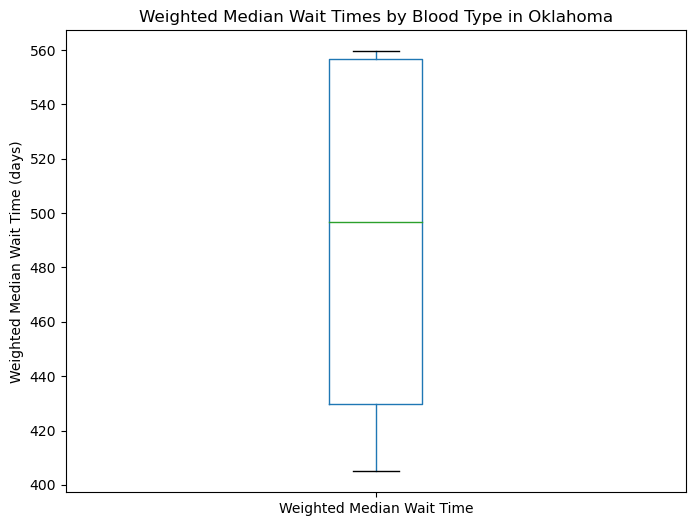

In [16]:
#Weighted Median Wait Times for each blood type in Oklahoma
weighted_median_wait_times = {
    'Blood Type O': 555.84,
    'Blood Type A': 437.97,
    'Blood Type B': 559.55,
    'Blood Type AB': 405.00
}

# Convert the dictionary to a DataFrame
df_wait_times = pd.DataFrame(list(weighted_median_wait_times.items()), columns=["Blood Type", "Weighted Median Wait Time"])

# Create a boxplot
plt.figure(figsize=(8, 6))
boxplot = df_wait_times.boxplot(column='Weighted Median Wait Time', grid=False)
plt.title("Weighted Median Wait Times by Blood Type in Oklahoma")
plt.ylabel("Weighted Median Wait Time (days)")
plt.show()

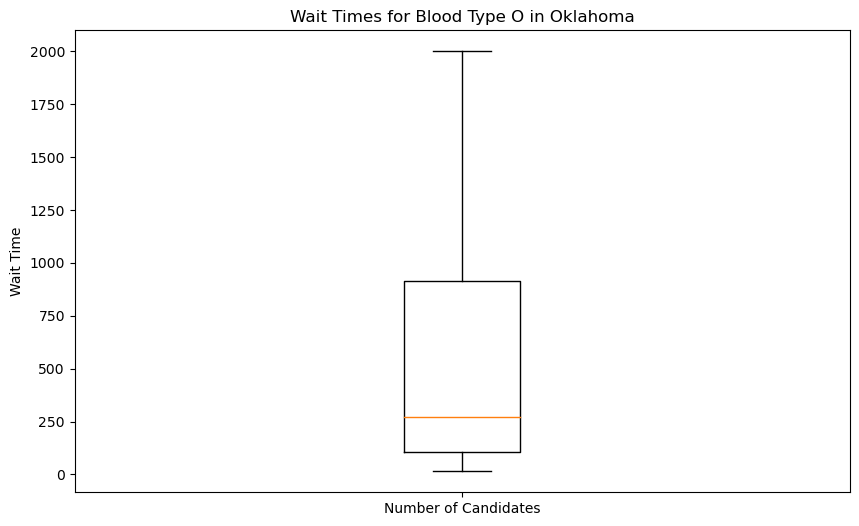

In [17]:
# Data for blood type O in Oklahoma
ok_blood_type_O_df = {
    "Wait time": ["< 30 days", "30 to < 90 days", "90 days to < 6 months", "6 months to < 1 year",
                  "1 year to < 2 years", "2 years to < 3 years", "3 years to < 5 years", "> 5 years"],
    "Candidates": [16, 24, 39, 64, 82, 70, 48, 15]
}

# Create a DataFrame
df = pd.DataFrame(ok_blood_type_O_df)

# Create a mapping for wait times to numerical values
wait_time_mapping = {
    "< 30 days": 15,
    "30 to < 90 days": 60,
    "90 days to < 6 months": 120,
    "6 months to < 1 year": 180,
    "1 year to < 2 years": 365,
    "2 years to < 3 years": 730,
    "3 years to < 5 years": 1460,
    "> 5 years": 2000
}

# Convert the "Wait time" column to numerical values using the wait_time_mapping
df["Wait time"] = df["Wait time"].map(wait_time_mapping)

# Create a boxplot using matplotlib
plt.figure(figsize=(10, 6))
# Provide a list of lists for the boxplot function, swapping x and y
plt.boxplot([df["Wait time"]], vert=True)

# Set labels and title
plt.title("Wait Times for Blood Type O in Oklahoma")
plt.ylabel("Wait Time")
plt.xticks([1], ["Number of Candidates"])  # Set x-axis label

plt.show()

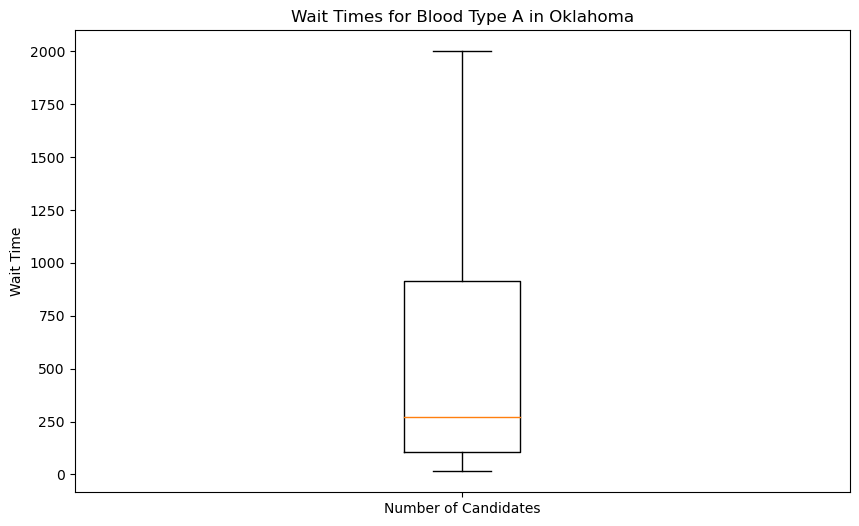

In [18]:
# Data for blood type A in Oklahoma
ok_blood_type_A_df = {
    "Wait time": ["< 30 days", "30 to < 90 days", "90 days to < 6 months", "6 months to < 1 year",
                  "1 year to < 2 years", "2 years to < 3 years", "3 years to < 5 years", "> 5 years"],
    "Candidates": [14, 15, 21, 46, 47, 25, 15, 7]
}

# Create a DataFrame
df = pd.DataFrame(ok_blood_type_A_df)

# Create a mapping for wait times to numerical values
wait_time_mapping = {
    "< 30 days": 15,
    "30 to < 90 days": 60,
    "90 days to < 6 months": 120,
    "6 months to < 1 year": 180,
    "1 year to < 2 years": 365,
    "2 years to < 3 years": 730,
    "3 years to < 5 years": 1460,
    "> 5 years": 2000
}

# Convert the "Wait time" column to numerical values using the wait_time_mapping
df["Wait time"] = df["Wait time"].map(wait_time_mapping)

# Create a boxplot using matplotlib
plt.figure(figsize=(10, 6))
# Provide a list of lists for the boxplot function, swapping x and y
plt.boxplot([df["Wait time"]], vert=True)

# Set labels and title
plt.title("Wait Times for Blood Type A in Oklahoma")
plt.ylabel("Wait Time")
plt.xticks([1], ["Number of Candidates"])  # Set x-axis label

plt.show()

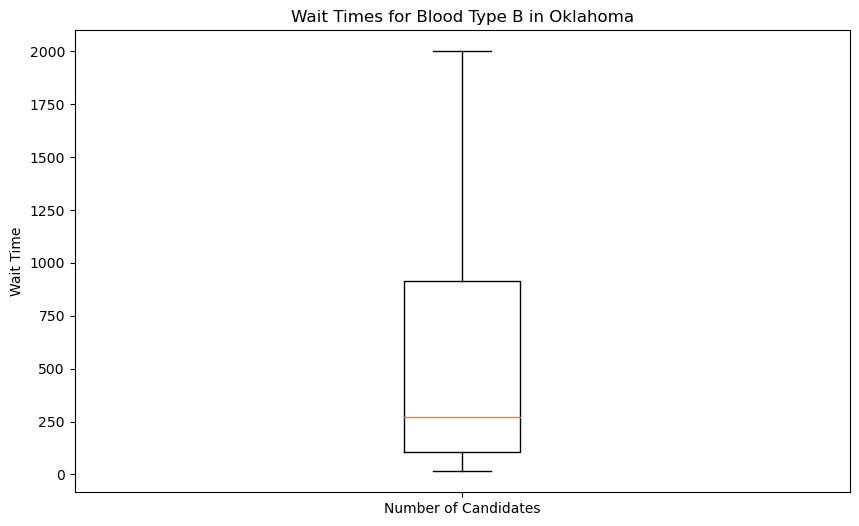

In [19]:
# Data for blood type B in Oklahoma
ok_blood_type_B_df = {
    "Wait time": ["< 30 days", "30 to < 90 days", "90 days to < 6 months", "6 months to < 1 year",
                  "1 year to < 2 years", "2 years to < 3 years", "3 years to < 5 years", "> 5 years"],
    "Candidates": [3, 9, 7, 13, 13, 8, 9, 5]
}

# Create a DataFrame
df = pd.DataFrame(ok_blood_type_B_df)

# Create a mapping for wait times to numerical values
wait_time_mapping = {
    "< 30 days": 15,
    "30 to < 90 days": 60,
    "90 days to < 6 months": 120,
    "6 months to < 1 year": 180,
    "1 year to < 2 years": 365,
    "2 years to < 3 years": 730,
    "3 years to < 5 years": 1460,
    "> 5 years": 2000
}

# Convert the "Wait time" column to numerical values using the wait_time_mapping
df["Wait time"] = df["Wait time"].map(wait_time_mapping)

# Create a boxplot using matplotlib
plt.figure(figsize=(10, 6))
# Provide a list of lists for the boxplot function, swapping x and y
plt.boxplot([df["Wait time"]], vert=True)

# Set labels and title
plt.title("Wait Times for Blood Type B in Oklahoma")
plt.ylabel("Wait Time")
plt.xticks([1], ["Number of Candidates"])  # Set x-axis label

plt.show()

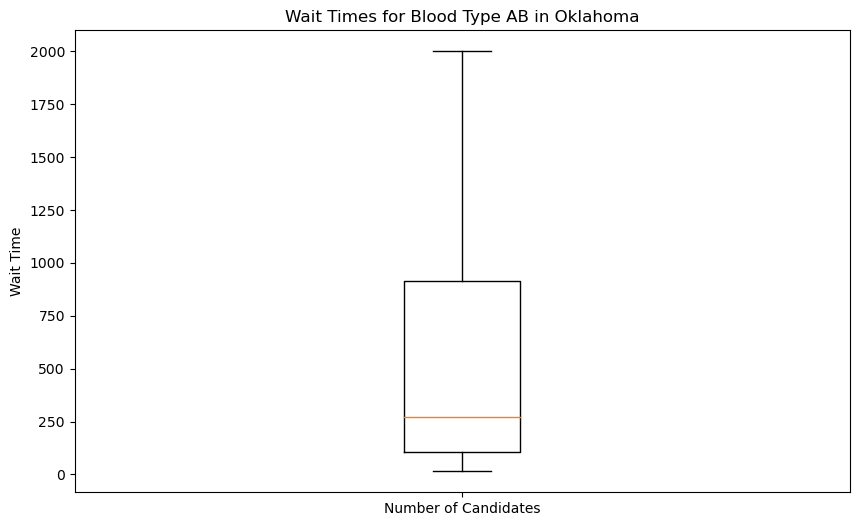

In [20]:
#The data is so low that a boxplot won't be very informative for the bloodtype AB due to the zero values.
#However a Logarithmic Scale could potentially show more on this if we wanted to scale it down that much. 
# Data for blood type B in Oklahoma
ok_blood_type_AB_df = {
    "Wait time": ["< 30 days", "30 to < 90 days", "90 days to < 6 months", "6 months to < 1 year",
                  "1 year to < 2 years", "2 years to < 3 years", "3 years to < 5 years", "> 5 years"],
    "Candidates": [0, 0, 1, 0, 1, 1, 0, 0]
}

# Create a DataFrame
df = pd.DataFrame(ok_blood_type_AB_df)

# Create a mapping for wait times to numerical values
wait_time_mapping = {
    "< 30 days": 15,
    "30 to < 90 days": 60,
    "90 days to < 6 months": 120,
    "6 months to < 1 year": 180,
    "1 year to < 2 years": 365,
    "2 years to < 3 years": 730,
    "3 years to < 5 years": 1460,
    "> 5 years": 2000
}

# Convert the "Wait time" column to numerical values using the wait_time_mapping
df["Wait time"] = df["Wait time"].map(wait_time_mapping)

# Create a boxplot using matplotlib
plt.figure(figsize=(10, 6))
# Provide a list of lists for the boxplot function, swapping x and y
plt.boxplot([df["Wait time"]], vert=True)

# Set labels and title
plt.title("Wait Times for Blood Type AB in Oklahoma")
plt.ylabel("Wait Time")
plt.xticks([1], ["Number of Candidates"])  # Set x-axis label

plt.show()

## Wait time by sex in Oklahoma

In [21]:
# Oklahoma total for each sex

ok_sex_male = ok_totals1.loc[ok_totals1["Sex"] == "Male"]["Total"].values[0]
ok_sex_female = ok_totals1.loc[ok_totals1["Sex"] == "Female"]["Total"].values[0]

print(ok_sex_male)
print(ok_sex_female)

381
216


In [22]:
# OK sex totals dataframe

ok_sex_totals = pd.DataFrame({"Sex":["Female", "Male"], "Candidates":[ok_sex_female, 
                                                                                   ok_sex_male]})
ok_sex_totals

,Sex,Candidates
0,Female,216
1,Male,381


In [23]:
# Hypothesis testing

# Assuming even distribution of people amongst sexes - mean of 298.5
# Degree of freedom is 2-1 = 1
# p-value = 0.05
# Reset index to sex

ok_sex_totals["Expected"] = 298.5

ok_sex_totals.set_index("Sex")

critical_value = stats.chi2.ppf(q = 0.95, df = 1)
print(critical_value)

3.841458820694124


In [24]:
# Null hypothesis is that number of candidates is evenly distributed amongst sexes

stats.chisquare(ok_sex_totals['Candidates'], ok_sex_totals['Expected'])

Power_divergenceResult(statistic=45.60301507537689, pvalue=1.4481849200081834e-11)

In [25]:
# Creating sex vs wait time dataframe

ok_sex_wait = pd.DataFrame(ok_totals1[["Sex","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_sex_wait

,Sex,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1028,Female,10,17,25,45,43,39,32,11
1029,Male,23,31,43,78,100,65,40,16


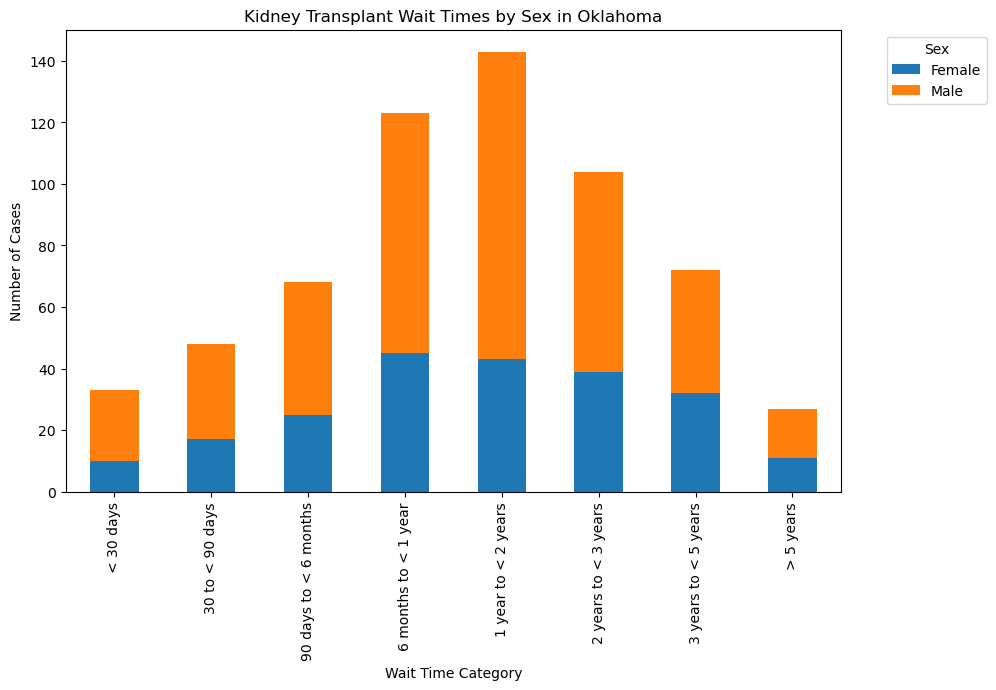

In [26]:
# Plot above on a bar chart
# Set Blood type as the index
ok_sex_data = ok_sex_wait.set_index("Sex")

# Transpose the DataFrame for easier plotting: https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php
ok_sex_data = ok_sex_data.transpose()

# Plot the bar chart
ok_sex_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Sex in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Sex", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [27]:
# Creating dataframes for each sex with wait times

# Used the following code to identify the number values assigned to each wait time for each sex:
#ok_sex_female_df = ok_sex_wait.loc[ok_sex_wait["Sex"] == "Female"].transpose().reset_index()
#ok_sex_female_df


ok_sex_male_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[23, 31, 43, 78, 100, 65, 40, 16]})
print(ok_sex_male_df)
print("")

ok_sex_female_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[10, 17, 25, 45, 43, 39, 32, 11]})
print(ok_sex_female_df)
print("")

               Wait time  Candidates
0              < 30 days          23
1        30 to < 90 days          31
2  90 days to < 6 months          43
3   6 months to < 1 year          78
4    1 year to < 2 years         100
5   2 years to < 3 years          65
6   3 years to < 5 years          40
7              > 5 years          16

               Wait time  Candidates
0              < 30 days          10
1        30 to < 90 days          17
2  90 days to < 6 months          25
3   6 months to < 1 year          45
4    1 year to < 2 years          43
5   2 years to < 3 years          39
6   3 years to < 5 years          32
7              > 5 years          11



## Wait time by ethnicity in Oklahoma

In [28]:
# Total for each ethnicity in Oklahoma

# Total of totals = 599 which is more than the 597 total Oklahoma candidates? Was getting errors on H due to ethnicity
#   type not existing for Oklahoma

ok_ethnicity_type_A = ok_totals1.loc[ok_totals1["Ethnicity"] == "White/Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_B = ok_totals1.loc[ok_totals1["Ethnicity"] == "Black/Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_C = ok_totals1.loc[ok_totals1["Ethnicity"] == "Hispanic/Latino"]["Total"].values[0]
ok_ethnicity_type_D = ok_totals1.loc[ok_totals1["Ethnicity"] == "Asian/Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_E = ok_totals1.loc[ok_totals1["Ethnicity"] == "Multiracial/Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_F = ok_totals1.loc[ok_totals1["Ethnicity"] == "American Indian/Alaska Native/Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_G = ok_totals1.loc[ok_totals1["Ethnicity"] == "Pacific Islander/Non-Hispanic"]["Total"].values[0]
#ok_ethnicity_type_H = ok_totals1.loc[ok_totals1["Ethnicity"] == "Unknown"]["Total"].values[0]

print(ok_ethnicity_type_A)
print(ok_ethnicity_type_B)
print(ok_ethnicity_type_C)
print(ok_ethnicity_type_D)
print(ok_ethnicity_type_E)
print(ok_ethnicity_type_F)
print(ok_ethnicity_type_G)
#print(ok_ethnicity_type_H)

304
113
65
27
18
68
4


In [29]:
# OK ethnicity totals dataframe

ok_ethnicity_totals = pd.DataFrame({"Ethnicity":["White/Non-Hispanic", "Black/Non-Hispanic", "Hispanic/Latino", 
                                                 "Asian/Non-Hispanic", "Multiracial/Non-Hispanic",
                                                "American Indian/Alaska Native/Non-Hispanic", 
                                                 "Pacific Islander/Non-Hispanic"], "Candidates":[ok_ethnicity_type_A, 
                                                                                                  ok_ethnicity_type_B, 
                                                                                                  ok_ethnicity_type_C, 
                                                                                                  ok_ethnicity_type_D, 
                                                                                                  ok_ethnicity_type_E, 
                                                                                                  ok_ethnicity_type_F, 
                                                                                                  ok_ethnicity_type_G]})
ok_ethnicity_totals

,Ethnicity,Candidates
0,White/Non-Hispanic,304
1,Black/Non-Hispanic,113
2,Hispanic/Latino,65
3,Asian/Non-Hispanic,27
4,Multiracial/Non-Hispanic,18
5,American Indian/Alaska Native/Non-Hispanic,68
6,Pacific Islander/Non-Hispanic,4


In [30]:
# Creating ethnicity vs wait time dataframe

ok_ethnicity_wait = pd.DataFrame(ok_totals1[["Ethnicity","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_ethnicity_wait

,Ethnicity,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1031,White/Non-Hispanic,19,25,35,63,77,55,35,11
1038,Black/Non-Hispanic,5,6,15,22,25,16,18,9
1040,American Indian/Alaska Native/Non-Hispanic,2,5,6,15,19,12,6,3
1042,Hispanic/Latino,5,6,6,15,11,13,8,3
1045,Asian/Non-Hispanic,1,4,3,6,8,2,2,1
1046,Multiracial/Non-Hispanic,1,2,3,2,1,7,2,0
1049,Pacific Islander/Non-Hispanic,0,0,0,1,2,0,1,0


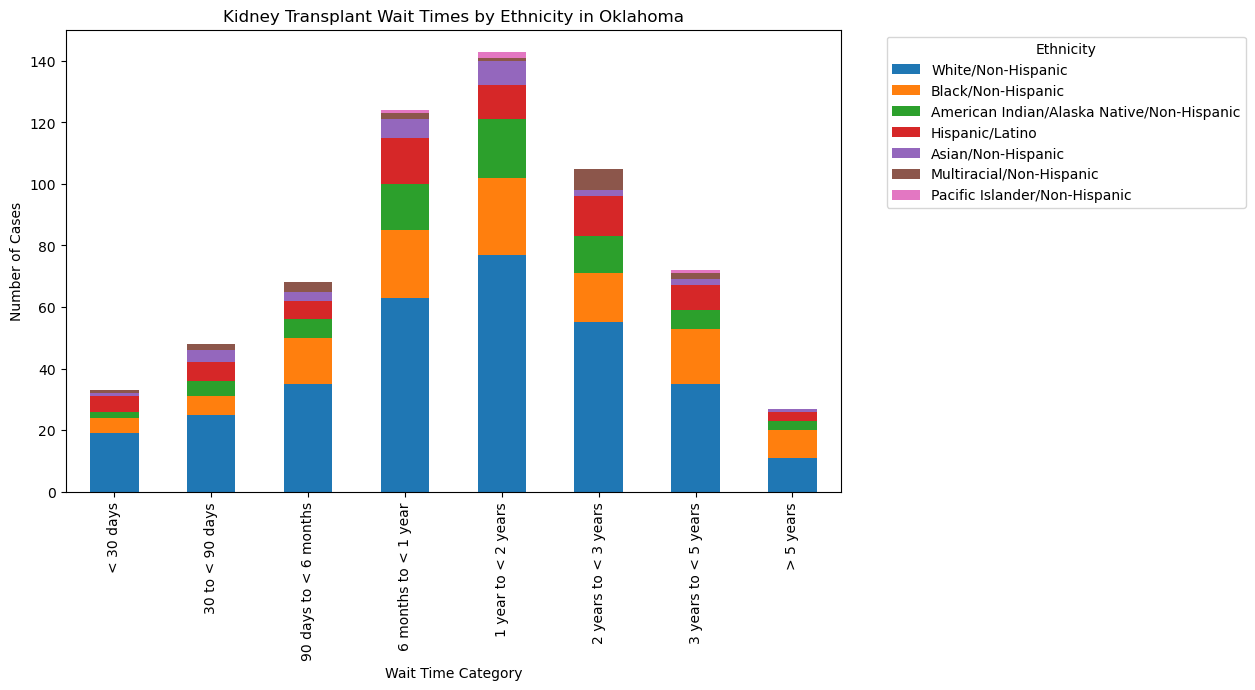

In [31]:
# Plot above on a bar chart

# Set Ethnicity as the index
ethnicity_data_for_plot = ok_ethnicity_wait.set_index("Ethnicity")

# Transpose the DataFrame for easier plotting
ethnicity_data_for_plot = ethnicity_data_for_plot.transpose()

# Plot the bar chart
ethnicity_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Ethnicity in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Ethnicity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [32]:
# Creating dataframes for each ethnicity with wait times

# Used the following code to identify the number values assigned to each wait time for each ethnicity:
# ok_ethnicity_type_A_df = ok_ethnicity_wait.loc[ok_ethnicity_wait["Ethnicity"] == "White, Non-Hispanic"].transpose().reset_index()
# ok_ethnicity_type_A_df


# White, Non-Hispanic
ok_ethnicity_type_A_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[19, 25, 35, 63, 77, 55, 35, 11]})

print(ok_ethnicity_type_A_df)
print("")


# Black, Non-Hispanic
ok_ethnicity_type_B_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[14, 15, 21, 46, 47, 25, 15, 7]})

print(ok_ethnicity_type_B_df)
print("")


# American Indian/Alaska Native, Non-Hispanic	
ok_ethnicity_type_C_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[5, 6, 6, 15, 11, 13, 8, 3]})

print(ok_ethnicity_type_C_df)
print("")


# Hispanic/Latino
ok_ethnicity_type_D_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[1, 4, 3, 6, 8, 2, 2, 1]})

print(ok_ethnicity_type_D_df)
print("")


# Asian, Non-Hispanic
ok_ethnicity_type_E_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[1, 2, 3, 2, 1, 7, 2, 0]})

print(ok_ethnicity_type_E_df)
print("")


# Multiracial, Non-Hispanic
ok_ethnicity_type_F_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[2, 5, 6, 15, 19, 12, 6, 3]})

print(ok_ethnicity_type_F_df)
print("")


# Pacific Islander, Non-Hispanic
ok_ethnicity_type_G_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[0, 0, 0, 1, 2, 0, 1, 0]})

print(ok_ethnicity_type_G_df)
print("")


# For national data - will include 'Unknown' category of ethnicity - find candidate values first:
# ethnicity_type_H_df = NTL_DF.loc[NTL_DF["Ethnicity"] == "Unknown"].transpose().reset_index()
# ethnicity_type_H_df

# Unknown
# ethnicity_type_H_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
#                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
#                                        "3 years to < 5 years", "> 5 years"], "Candidates":[?, ?, ?, ?, ?, ?, ?, ?]})

#print(ethnicity_type_H_df)
#print("")

               Wait time  Candidates
0              < 30 days          19
1        30 to < 90 days          25
2  90 days to < 6 months          35
3   6 months to < 1 year          63
4    1 year to < 2 years          77
5   2 years to < 3 years          55
6   3 years to < 5 years          35
7              > 5 years          11

               Wait time  Candidates
0              < 30 days          14
1        30 to < 90 days          15
2  90 days to < 6 months          21
3   6 months to < 1 year          46
4    1 year to < 2 years          47
5   2 years to < 3 years          25
6   3 years to < 5 years          15
7              > 5 years           7

               Wait time  Candidates
0              < 30 days           5
1        30 to < 90 days           6
2  90 days to < 6 months           6
3   6 months to < 1 year          15
4    1 year to < 2 years          11
5   2 years to < 3 years          13
6   3 years to < 5 years           8
7              > 5 years           3

## Wait time by age group in Oklahoma

In [33]:
# Total for each age group in Oklahoma

# Was getting errors on A and C due to age group not existing for Oklahoma

#ok_age_group_A = ok_totals1.loc[ok_totals1["Age"] == "< 1 Year"]["Total"].values[0]
ok_age_group_B = ok_totals1.loc[ok_totals1["Age"] == "1-5 Years"]["Total"].values[0]

#ok_age_group_C = ok_totals1.loc[ok_totals1["Age"] == "6-10 Years"]["Total"].values[0]
ok_age_group_D = ok_totals1.loc[ok_totals1["Age"] == "11-17 Years"]["Total"].values[0]
ok_age_group_E = ok_totals1.loc[ok_totals1["Age"] == "18-34 Years"]["Total"].values[0]
ok_age_group_F = ok_totals1.loc[ok_totals1["Age"] == "35-49 Years"]["Total"].values[0]
ok_age_group_G = ok_totals1.loc[ok_totals1["Age"] == "50-64 Years"]["Total"].values[0]
ok_age_group_H = ok_totals1.loc[ok_totals1["Age"] == "65 +"]["Total"].values[0]

#print(ok_age_group_A)
print(ok_age_group_B)

#print(ok_age_group_C)
print(ok_age_group_D)
print(ok_age_group_E)
print(ok_age_group_F)
print(ok_age_group_G)
print(ok_age_group_H)

6
2
63
129
247
150


In [34]:
# OK ethnicity totals dataframe

ok_age_totals = pd.DataFrame({"Age":["1-5 Years", "11-17 Years", "18-34 Years", "35-49 Years", "50-64 Years", "65 +"], 
                              "Candidates":[ok_age_group_B, ok_age_group_D, ok_age_group_E, ok_age_group_F, 
                                            ok_age_group_G, ok_age_group_H]})

ok_age_totals

,Age,Candidates
0,1-5 Years,6
1,11-17 Years,2
2,18-34 Years,63
3,35-49 Years,129
4,50-64 Years,247
5,65 +,150


In [35]:
# Hypothesis testing

#Assuming even distribution of people amongst age groups - mean of 99.5
# Degree of freedom is 6-1 = 5
# p-value = 0.05
# Reset index to age

ok_age_totals["Expected"] = 99.5

ok_age_totals.set_index("Age")

critical_value = stats.chi2.ppf(q = 0.95, df = 5)
print(critical_value)

11.070497693516351


In [36]:
# Null hypothesis is that number of candidates is evenly distributed amongst age groups

stats.chisquare(ok_age_totals['Candidates'], ok_age_totals['Expected'])

Power_divergenceResult(statistic=449.82412060301505, pvalue=5.3605507096331644e-95)

In [37]:
# Creating age vs wait time dataframe

ok_age_wait = pd.DataFrame(ok_totals1[["Age","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_age_wait

,Age,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1033,50-64 Years,12,23,39,47,61,40,28,10
1036,65 +,8,7,13,33,37,28,21,7
1037,35-49 Years,8,10,7,30,29,22,15,10
1043,18-34 Years,3,6,9,13,15,11,8,0
1048,1-5 Years,2,1,0,0,1,2,0,0
1053,11-17 Years,0,1,0,0,0,1,0,0


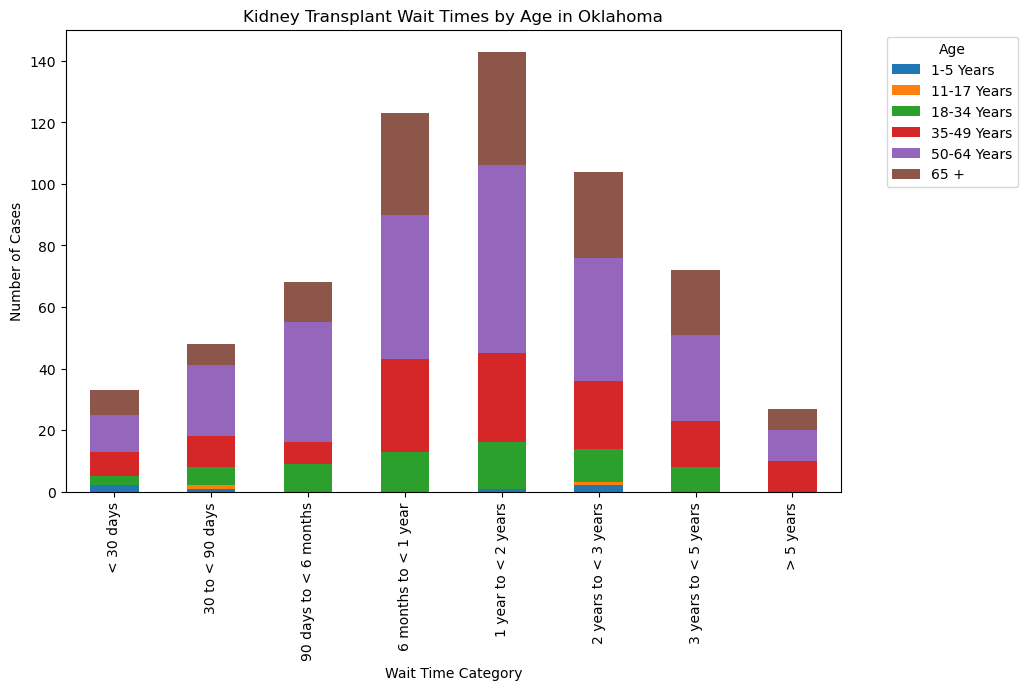

In [38]:
# Plot above on a bar chart
# Set "Age" as the index
age_data_for_plot = ok_age_wait.set_index("Age")

# Specify the desired order of ages
ordered_ages = ["1-5 Years", "11-17 Years", "18-34 Years", "35-49 Years", "50-64 Years", "65 +"]

# Reorder the rows based on the desired order
age_data_for_plot = age_data_for_plot.loc[ordered_ages]

# Transpose the DataFrame for easier plotting
age_data_for_plot = age_data_for_plot.transpose()

# Plot the bar chart
age_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Age in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [39]:
# Creating dataframes for each age group with wait times

# Used the following code to identify the number values assigned to each wait time for each age group:
# ok_age_type_A_df = ok_age_wait.loc[ok_age_wait["Age"] == "< 1 Year"].transpose().reset_index()
# ok_age_type_A_df


# For national data - will include < 1 Year category of age
# age_type_A_df = NTL_DF.loc[NTL_DF["Age"] == "< 1 Year"].transpose().reset_index()
# age_type_A_df

# < 1 Year
# age_type_A_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
#                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
#                                        "3 years to < 5 years", "> 5 years"], "Candidates":[?, ?, ?, ?, ?, ?, ?, ?]})

#print(age_type_A_df)
#print("")


# 1-5 Years
ok_age_type_B_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[2, 1, 0, 0, 1, 2, 0, 0]})
print(ok_age_type_B_df)
print("")


# For national data - will include 6-10 Years category of age - to find values first do:
# age_type_C_df = NTL_DF.loc[NTL_DF["Age"] == "6-10 Years"].transpose().reset_index()
# age_type_C_df

# 6-10 Years
#age_type_C_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
#                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
#                                        "3 years to < 5 years", "> 5 years"], "Candidates":[?, ?, ?, ?, ?, ?, ?, ?]})
#print(age_type_C_df)
#print("")


# 11-17 Years
ok_age_type_D_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[0, 1, 0, 0, 0, 1, 0, 0]})

print(ok_age_type_D_df)
print("")


# 18-34 Years
ok_age_type_E_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[1, 2, 3, 2, 1, 7, 2, 0]})
print(ok_age_type_E_df)
print("")


# 35-49 Years
ok_age_type_F_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[8, 10, 7, 30, 29, 22, 15, 10]})
print(ok_age_type_F_df)
print("")


# 50-64 Years
ok_age_type_G_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[12, 23, 39, 47, 61, 40, 28, 10]})
print(ok_age_type_G_df)
print("")


# 65 +
ok_age_type_H_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[8, 7, 13, 33, 37, 28, 21, 7]})

print(ok_age_type_H_df)
print("")

               Wait time  Candidates
0              < 30 days           2
1        30 to < 90 days           1
2  90 days to < 6 months           0
3   6 months to < 1 year           0
4    1 year to < 2 years           1
5   2 years to < 3 years           2
6   3 years to < 5 years           0
7              > 5 years           0

               Wait time  Candidates
0              < 30 days           0
1        30 to < 90 days           1
2  90 days to < 6 months           0
3   6 months to < 1 year           0
4    1 year to < 2 years           0
5   2 years to < 3 years           1
6   3 years to < 5 years           0
7              > 5 years           0

               Wait time  Candidates
0              < 30 days           1
1        30 to < 90 days           2
2  90 days to < 6 months           3
3   6 months to < 1 year           2
4    1 year to < 2 years           1
5   2 years to < 3 years           7
6   3 years to < 5 years           2
7              > 5 years           0

# National

## Blood type

In [82]:
# Calculating blood type totals

nat_blood_type_O = kidney_data.loc[kidney_data["Blood type"] == "O"]["Total"].sum()
nat_blood_type_A = kidney_data.loc[kidney_data["Blood type"] == "A"]["Total"].sum()
nat_blood_type_B = kidney_data.loc[kidney_data["Blood type"] == "B"]["Total"].sum()
nat_blood_type_AB = kidney_data.loc[kidney_data["Blood type"] == "AB"]["Total"].sum()
total_blood_types = nat_blood_type_O + nat_blood_type_A + nat_blood_type_B + nat_blood_type_AB
print(nat_blood_type_O)
print(nat_blood_type_A)
print(nat_blood_type_B)
print(nat_blood_type_AB)
print(total_blood_types)

48086
24207
14216
2258
88767


In [83]:
#National Candidates per Bloodtype
nat_blood_type_totals = pd.DataFrame({"Blood type":["O", "A", "B", 
                                        "AB"], "Candidates":[nat_blood_type_O, nat_blood_type_A, nat_blood_type_B, 
                                                             nat_blood_type_AB]})
nat_blood_type_totals

,Blood type,Candidates
0,O,48086
1,A,24207
2,B,14216
3,AB,2258


In [95]:
# Creating blood type vs wait time dataframe
nat_blood_type_wait = pd.DataFrame(kidney_data[["Blood type", "< 30 days", "30 to < 90 days", "90 days to < 6 months","6 months to < 1 year", "1 year to < 2 years", "2 years to < 3 years", 

                                                "3 years to < 5 years", "> 5 years"]]).dropna()

nat_o1 = kidney_data.loc[kidney_data["Blood type"] == "O"]["< 30 days"].values
nat_o2 = kidney_data.loc[kidney_data["Blood type"] == "O"]["30 to < 90 days"].values
nat_o3 = kidney_data.loc[kidney_data["Blood type"] == "O"]["90 days to < 6 months"].values
nat_o4 = kidney_data.loc[kidney_data["Blood type"] == "O"]["6 months to < 1 year"].values
nat_o5 = kidney_data.loc[kidney_data["Blood type"] == "O"]["1 year to < 2 years"].values
nat_o6 = kidney_data.loc[kidney_data["Blood type"] == "O"]["2 years to < 3 years"].values
nat_o7 = kidney_data.loc[kidney_data["Blood type"] == "O"]["3 years to < 5 years"].values
nat_o8 = kidney_data.loc[kidney_data["Blood type"] == "O"]["> 5 years"].values

nat_a1 = kidney_data.loc[kidney_data["Blood type"] == "A"]["< 30 days"].values
nat_a2 = kidney_data.loc[kidney_data["Blood type"] == "A"]["30 to < 90 days"].values
nat_a3 = kidney_data.loc[kidney_data["Blood type"] == "A"]["90 days to < 6 months"].values
nat_a4 = kidney_data.loc[kidney_data["Blood type"] == "A"]["6 months to < 1 year"].values
nat_a5 = kidney_data.loc[kidney_data["Blood type"] == "A"]["1 year to < 2 years"].values
nat_a6 = kidney_data.loc[kidney_data["Blood type"] == "A"]["2 years to < 3 years"].values
nat_a7 = kidney_data.loc[kidney_data["Blood type"] == "A"]["3 years to < 5 years"].values
nat_a8 = kidney_data.loc[kidney_data["Blood type"] == "A"]["> 5 years"].values

nat_b1 = kidney_data.loc[kidney_data["Blood type"] == "B"]["< 30 days"].values
nat_b2 = kidney_data.loc[kidney_data["Blood type"] == "B"]["30 to < 90 days"].values
nat_b3 = kidney_data.loc[kidney_data["Blood type"] == "B"]["90 days to < 6 months"].values
nat_b4 = kidney_data.loc[kidney_data["Blood type"] == "B"]["6 months to < 1 year"].values
nat_b5 = kidney_data.loc[kidney_data["Blood type"] == "B"]["1 year to < 2 years"].values
nat_b6 = kidney_data.loc[kidney_data["Blood type"] == "B"]["2 years to < 3 years"].values
nat_b7 = kidney_data.loc[kidney_data["Blood type"] == "B"]["3 years to < 5 years"].values
nat_b8 = kidney_data.loc[kidney_data["Blood type"] == "B"]["> 5 years"].values

nat_ab1 = kidney_data.loc[kidney_data["Blood type"] == "AB"]["< 30 days"].values
nat_ab2 = kidney_data.loc[kidney_data["Blood type"] == "AB"]["30 to < 90 days"].values
nat_ab3 = kidney_data.loc[kidney_data["Blood type"] == "AB"]["90 days to < 6 months"].values
nat_ab4 = kidney_data.loc[kidney_data["Blood type"] == "AB"]["6 months to < 1 year"].values
nat_ab5 = kidney_data.loc[kidney_data["Blood type"] == "AB"]["1 year to < 2 years"].values
nat_ab6 = kidney_data.loc[kidney_data["Blood type"] == "AB"]["2 years to < 3 years"].values
nat_ab7 = kidney_data.loc[kidney_data["Blood type"] == "AB"]["3 years to < 5 years"].values
nat_ab8 = kidney_data.loc[kidney_data["Blood type"] == "AB"]["> 5 years"].values

nat_o11 = sum(nat_o1)
nat_o21 = sum(nat_o2)
nat_o31 = sum(nat_o3)
nat_o41 = sum(nat_o4)
nat_o51 = sum(nat_o5)
nat_o61 = sum(nat_o6)
nat_o71 = sum(nat_o7)
nat_o81 = sum(nat_o8)

nat_a11 = sum(nat_a1)
nat_a21 = sum(nat_a2)
nat_a31 = sum(nat_a3)
nat_a41 = sum(nat_a4)
nat_a51 = sum(nat_a5)
nat_a61 = sum(nat_a6)
nat_a71 = sum(nat_a7)
nat_a81 = sum(nat_a8)

nat_b11 = sum(nat_b1)
nat_b21 = sum(nat_b2)
nat_b31 = sum(nat_b3)
nat_b41 = sum(nat_b4)
nat_b51 = sum(nat_b5)
nat_b61 = sum(nat_b6)
nat_b71 = sum(nat_b7)
nat_b81 = sum(nat_b8)

nat_ab11 = sum(nat_ab1)
nat_ab21 = sum(nat_ab2)
nat_ab31 = sum(nat_ab3)
nat_ab41 = sum(nat_ab4)
nat_ab51 = sum(nat_ab5)
nat_ab61 = sum(nat_ab6)
nat_ab71 = sum(nat_ab7)
nat_ab81 = sum(nat_ab8)


nat_blood_type_wait = pd.DataFrame({"Blood type":["O", "A", "B", "AB"], "< 30 days":[nat_o11, nat_a11, nat_b11, nat_ab11], 
                                    "30 to < 90 days": [nat_o21, nat_a21, nat_b21, nat_ab21], 
                                    "90 days to < 6 months": [nat_o31, nat_a31, nat_b31, nat_ab31], 
                                    "6 months to < 1 year" : [nat_o41, nat_a41, nat_b41, nat_ab41], 
                                    "1 year to < 2 years": [nat_o51, nat_a51, nat_b51, nat_ab51],
                                    "2 years to < 3 years": [nat_o61, nat_a61, nat_b61, nat_ab61], 
                                    "3 years to < 5 years": [nat_o71, nat_a71, nat_b71, nat_ab71], 
                                    "> 5 years": [nat_o81, nat_a81, nat_b81, nat_ab81]})


nat_blood_type_wait

,Blood type,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
0,O,1798,3330,4532,7560,11225,7634,8577,6128
1,A,1111,2013,2595,4106,5816,3499,3402,2554
2,B,535,1044,1424,2197,3252,2222,2422,1938
3,AB,140,219,267,383,503,287,287,219


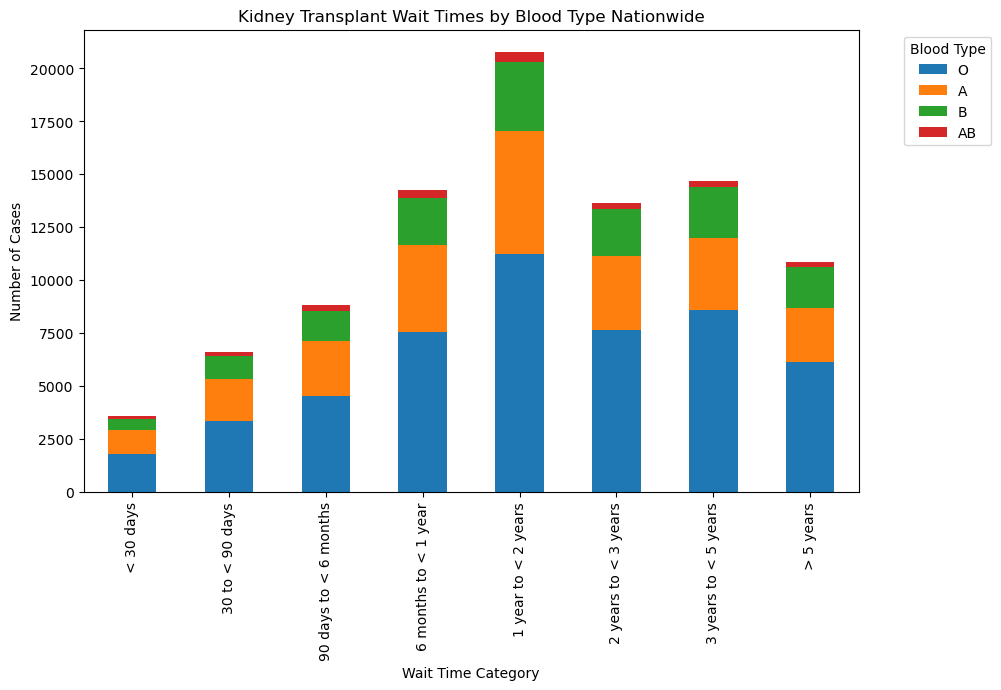

In [85]:
#Plot above on bar chart
#Set Blood type as the index
nat_blood_data = nat_blood_type_wait.set_index("Blood type")

# Transpose the DataFrame for easier plotting: https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php
nat_blood_data = nat_blood_data.transpose()

# Plot the bar chart
nat_blood_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Blood Type Nationwide")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Blood Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## By sex

In [87]:
# National total for each sex

nat_sex_male = kidney_data.loc[kidney_data["Sex"] == "Male"]["Total"].values
nat_sex_female = kidney_data.loc[kidney_data["Sex"] == "Female"]["Total"].values

nat_sex_male1 = sum(nat_sex_male)
nat_sex_female1 = sum(nat_sex_female)

print(nat_sex_male1)
print(nat_sex_female1)

55132
33648


In [96]:
#National sex totals dataframe

nat_sex_totals = pd.DataFrame({"Sex":["Female", "Male"], "Candidates":[nat_sex_female1, nat_sex_male1]})
nat_sex_totals

,Sex,Candidates
0,Female,33648
1,Male,55132


In [97]:


nat_sex_m30 = kidney_data.loc[kidney_data["Sex"] == "Male"]["< 30 days"].values
nat_sex_m31 = kidney_data.loc[kidney_data["Sex"] == "Male"]["30 to < 90 days"].values
nat_sex_m32 = kidney_data.loc[kidney_data["Sex"] == "Male"]["90 days to < 6 months"].values
nat_sex_m33 = kidney_data.loc[kidney_data["Sex"] == "Male"]["6 months to < 1 year"].values
nat_sex_m34 = kidney_data.loc[kidney_data["Sex"] == "Male"]["1 year to < 2 years"].values
nat_sex_m35 = kidney_data.loc[kidney_data["Sex"] == "Male"]["2 years to < 3 years"].values
nat_sex_m36 = kidney_data.loc[kidney_data["Sex"] == "Male"]["3 years to < 5 years"].values
nat_sex_m37 = kidney_data.loc[kidney_data["Sex"] == "Male"]["> 5 years"].values

nat_sex_f30 = kidney_data.loc[kidney_data["Sex"] == "Female"]["< 30 days"].values
nat_sex_f31 = kidney_data.loc[kidney_data["Sex"] == "Female"]["30 to < 90 days"].values
nat_sex_f32 = kidney_data.loc[kidney_data["Sex"] == "Female"]["90 days to < 6 months"].values
nat_sex_f33 = kidney_data.loc[kidney_data["Sex"] == "Female"]["6 months to < 1 year"].values
nat_sex_f34 = kidney_data.loc[kidney_data["Sex"] == "Female"]["1 year to < 2 years"].values
nat_sex_f35 = kidney_data.loc[kidney_data["Sex"] == "Female"]["2 years to < 3 years"].values
nat_sex_f36 = kidney_data.loc[kidney_data["Sex"] == "Female"]["3 years to < 5 years"].values
nat_sex_f37 = kidney_data.loc[kidney_data["Sex"] == "Female"]["> 5 years"].values

nat_sex_m301 = sum(nat_sex_m30)
nat_sex_m311 = sum(nat_sex_m31)
nat_sex_m321 = sum(nat_sex_m32)
nat_sex_m331 = sum(nat_sex_m33)
nat_sex_m341 = sum(nat_sex_m34)
nat_sex_m351 = sum(nat_sex_m35)
nat_sex_m361 = sum(nat_sex_m36)
nat_sex_m371 = sum(nat_sex_m37)

nat_sex_f301 = sum(nat_sex_f30)
nat_sex_f311 = sum(nat_sex_f31)
nat_sex_f321 = sum(nat_sex_f32)
nat_sex_f331 = sum(nat_sex_f33)
nat_sex_f341 = sum(nat_sex_f34)
nat_sex_f351 = sum(nat_sex_f35)
nat_sex_f361 = sum(nat_sex_f36)
nat_sex_f371 = sum(nat_sex_f37)


nat_sex_wait = pd.DataFrame({"Sex":["Female", "Male"], "< 30 days":[nat_sex_f301, nat_sex_m301], 
                             "30 to < 90 days": [nat_sex_f311, nat_sex_m311], 
                             "90 days to < 6 months": [nat_sex_f321, nat_sex_m321], 
                             "6 months to < 1 year" : [nat_sex_f331, nat_sex_m331], 
                             "1 year to < 2 years": [nat_sex_f341, nat_sex_m341], 
                             "2 years to < 3 years": [nat_sex_f351, nat_sex_m351], 
                             "3 years to < 5 years": [nat_sex_f361, nat_sex_m361], 
                             "> 5 years": [nat_sex_f371, nat_sex_m371]})

nat_sex_wait

,Sex,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
0,Female,1312,2528,3323,5395,7826,4997,5524,4304
1,Male,2272,4079,5495,8851,12972,8645,9164,6535


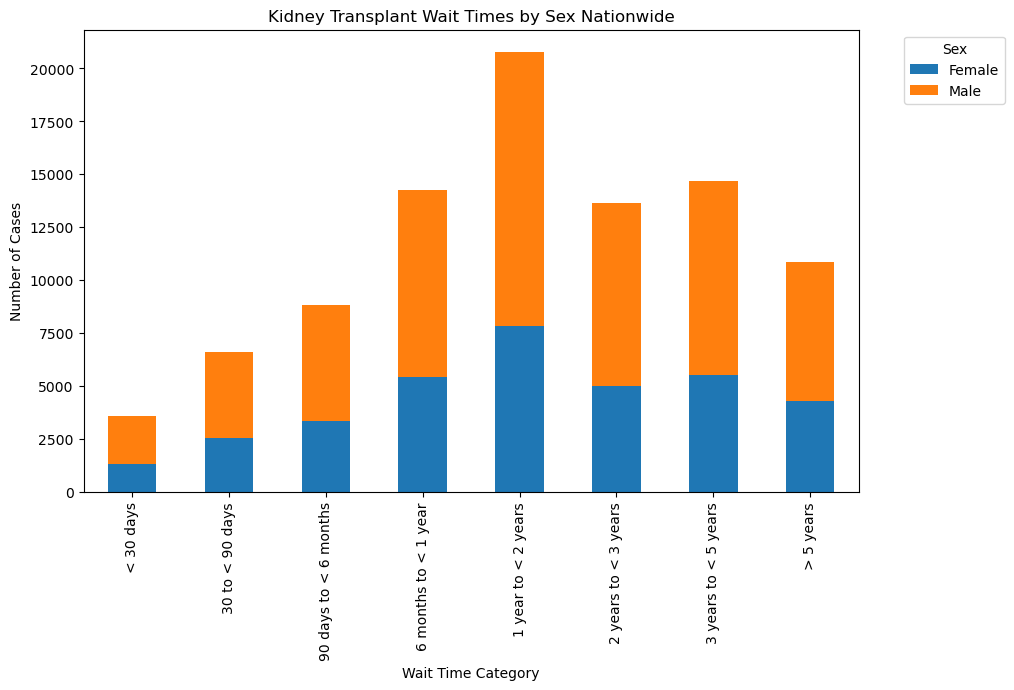

In [98]:
# Plot above on a bar chart
# Set Blood type as the index
nat_sex_data = nat_sex_wait.set_index("Sex")

# Transpose the DataFrame for easier plotting: https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php
nat_sex_data = nat_sex_data.transpose()

# Plot the bar chart
nat_sex_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Sex Nationwide")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Sex", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [92]:
# Hypothesis testing

# Assuming even distribution of people amongst sexes - mean of 44390
# Degree of freedom is 2-1 = 1
# p-value = 0.05
# Reset index to sex

nat_sex_totals["Expected"] = 44390
nat_sex_totals.set_index("Sex")

critical_value = stats.chi2.ppf(q = 0.95, df = 1)
print(critical_value)

3.841458820694124


In [93]:
#Null hypothesis is that number of candidates is evenly distributed amongst sexes

stats.chisquare(nat_sex_totals['Candidates'], nat_sex_totals['Expected'])

Power_divergenceResult(statistic=5198.94408650597, pvalue=0.0)

## By ethnicity

In [94]:
# Total for each ethnicity Nationwide
nat_ethnicity_type_A = kidney_data.loc[kidney_data["Ethnicity"] == "White/Non-Hispanic"]["Total"].sum()
nat_ethnicity_type_B = kidney_data.loc[kidney_data["Ethnicity"] == "Black/Non-Hispanic"]["Total"].sum()
nat_ethnicity_type_C = kidney_data.loc[kidney_data["Ethnicity"] == "Hispanic/Latino"]["Total"].sum()
nat_ethnicity_type_D = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["Total"].sum()
nat_ethnicity_type_E = kidney_data.loc[kidney_data["Ethnicity"] == "Multiracial/Non-Hispanic"]["Total"].sum()
nat_ethnicity_type_F = kidney_data.loc[kidney_data["Ethnicity"] == "American Indian/Alaska Native/Non-Hispanic"]["Total"].sum()
nat_ethnicity_type_G = kidney_data.loc[kidney_data["Ethnicity"] == "Pacific Islander/Non-Hispanic"]["Total"].sum()
nat_ethnicity_type_H = kidney_data.loc[kidney_data["Ethnicity"] == "Unknown"]["Total"].sum()

print(nat_ethnicity_type_A)
print(nat_ethnicity_type_B)
print(nat_ethnicity_type_C)
print(nat_ethnicity_type_D)
print(nat_ethnicity_type_E)
print(nat_ethnicity_type_F)
print(nat_ethnicity_type_G)
print(nat_ethnicity_type_H)

31836
26737
20203
8115
817
757
584
87


In [51]:
#national ethnicity totals dataframe
nat_ethnicity_totals = pd.DataFrame({"Ethnicity":["White/Non-Hispanic", "Black/Non-Hispanic", "Hispanic/Latino", 
                                                 "Asian/Non-Hispanic", "Multiracial/Non-Hispanic",
                                                "American Indian/Alaska Native/Non-Hispanic", 
                                                 "Pacific Islander/Non-Hispanic"], "Candidates":[nat_ethnicity_type_A, 
                                                                                                  nat_ethnicity_type_B, 
                                                                                                  nat_ethnicity_type_C, 
                                                                                                 nat_ethnicity_type_D, 
                                                                                                  nat_ethnicity_type_E, 
                                                                                                 nat_ethnicity_type_F, 
                                                                                                 nat_ethnicity_type_G]})
nat_ethnicity_totals

,Ethnicity,Candidates
0,White/Non-Hispanic,31836
1,Black/Non-Hispanic,26737
2,Hispanic/Latino,20203
3,Asian/Non-Hispanic,8115
4,Multiracial/Non-Hispanic,817
5,American Indian/Alaska Native/Non-Hispanic,757
6,Pacific Islander/Non-Hispanic,584


In [99]:
# Creating ethnicity vs wait time dataframe

nat_ethnicity_wait = pd.DataFrame(kidney_data[["Ethnicity","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()


nat_eth_m30 = kidney_data.loc[kidney_data["Ethnicity"] == "White/Non-Hispanic"]["< 30 days"].values
nat_eth_m31 = kidney_data.loc[kidney_data["Ethnicity"] == "White/Non-Hispanic"]["30 to < 90 days"].values
nat_eth_m32 = kidney_data.loc[kidney_data["Ethnicity"] == "White/Non-Hispanic"]["90 days to < 6 months"].values
nat_eth_m33 = kidney_data.loc[kidney_data["Ethnicity"] == "White/Non-Hispanic"]["6 months to < 1 year"].values
nat_eth_m34 = kidney_data.loc[kidney_data["Ethnicity"] == "White/Non-Hispanic"]["1 year to < 2 years"].values
nat_eth_m35 = kidney_data.loc[kidney_data["Ethnicity"] == "White/Non-Hispanic"]["2 years to < 3 years"].values
nat_eth_m36 = kidney_data.loc[kidney_data["Ethnicity"] == "White/Non-Hispanic"]["3 years to < 5 years"].values
nat_eth_m37 = kidney_data.loc[kidney_data["Ethnicity"] == "White/Non-Hispanic"]["> 5 years"].values

nat_eth_f30 = kidney_data.loc[kidney_data["Ethnicity"] == "Black/Non-Hispanic"]["< 30 days"].values
nat_eth_f31 = kidney_data.loc[kidney_data["Ethnicity"] == "Black/Non-Hispanic"]["30 to < 90 days"].values
nat_eth_f32 = kidney_data.loc[kidney_data["Ethnicity"] == "Black/Non-Hispanic"]["90 days to < 6 months"].values
nat_eth_f33 = kidney_data.loc[kidney_data["Ethnicity"] == "Black/Non-Hispanic"]["6 months to < 1 year"].values
nat_eth_f34 = kidney_data.loc[kidney_data["Ethnicity"] == "Black/Non-Hispanic"]["1 year to < 2 years"].values
nat_eth_f35 = kidney_data.loc[kidney_data["Ethnicity"] == "Black/Non-Hispanic"]["2 years to < 3 years"].values
nat_eth_f36 = kidney_data.loc[kidney_data["Ethnicity"] == "Black/Non-Hispanic"]["3 years to < 5 years"].values
nat_eth_f37 = kidney_data.loc[kidney_data["Ethnicity"] == "Black/Non-Hispanic"]["> 5 years"].values

nat_eth_r30 = kidney_data.loc[kidney_data["Ethnicity"] == "Hispanic/Latino"]["< 30 days"].values
nat_eth_r31 = kidney_data.loc[kidney_data["Ethnicity"] == "Hispanic/Latino"]["30 to < 90 days"].values
nat_eth_r32 = kidney_data.loc[kidney_data["Ethnicity"] == "Hispanic/Latino"]["90 days to < 6 months"].values
nat_eth_r33 = kidney_data.loc[kidney_data["Ethnicity"] == "Hispanic/Latino"]["6 months to < 1 year"].values
nat_eth_r34 = kidney_data.loc[kidney_data["Ethnicity"] == "Hispanic/Latino"]["1 year to < 2 years"].values
nat_eth_r35 = kidney_data.loc[kidney_data["Ethnicity"] == "Hispanic/Latino"]["2 years to < 3 years"].values
nat_eth_r36 = kidney_data.loc[kidney_data["Ethnicity"] == "Hispanic/Latino"]["3 years to < 5 years"].values
nat_eth_r37 = kidney_data.loc[kidney_data["Ethnicity"] == "Hispanic/Latino"]["> 5 years"].values

nat_eth_k30 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["< 30 days"].values
nat_eth_k31 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["30 to < 90 days"].values
nat_eth_k32 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["90 days to < 6 months"].values
nat_eth_k33 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["6 months to < 1 year"].values
nat_eth_k34 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["1 year to < 2 years"].values
nat_eth_k35 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["2 years to < 3 years"].values
nat_eth_k36 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["3 years to < 5 years"].values
nat_eth_k37 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["> 5 years"].values

nat_eth_w30 = kidney_data.loc[kidney_data["Ethnicity"] == "Multiracial/Non-Hispanic"]["< 30 days"].values
nat_eth_w31 = kidney_data.loc[kidney_data["Ethnicity"] == "Multiracial/Non-Hispanic"]["30 to < 90 days"].values
nat_eth_w32 = kidney_data.loc[kidney_data["Ethnicity"] == "Multiracial/Non-Hispanic"]["90 days to < 6 months"].values
nat_eth_w33 = kidney_data.loc[kidney_data["Ethnicity"] == "Multiracial/Non-Hispanic"]["6 months to < 1 year"].values
nat_eth_w34 = kidney_data.loc[kidney_data["Ethnicity"] == "Multiracial/Non-Hispanic"]["1 year to < 2 years"].values
nat_eth_w35 = kidney_data.loc[kidney_data["Ethnicity"] == "Multiracial/Non-Hispanic"]["2 years to < 3 years"].values
nat_eth_w36 = kidney_data.loc[kidney_data["Ethnicity"] == "Multiracial/Non-Hispanic"]["3 years to < 5 years"].values
nat_eth_w37 = kidney_data.loc[kidney_data["Ethnicity"] == "Multiracial/Non-Hispanic"]["> 5 years"].values

nat_eth_h30 = kidney_data.loc[kidney_data["Ethnicity"] == "American Indian/Alaska Native/Non-Hispanic"]["< 30 days"].values
nat_eth_h31 = kidney_data.loc[kidney_data["Ethnicity"] == "American Indian/Alaska Native/Non-Hispanic"]["30 to < 90 days"].values
nat_eth_h32 = kidney_data.loc[kidney_data["Ethnicity"] == "American Indian/Alaska Native/Non-Hispanic"]["90 days to < 6 months"].values
nat_eth_h33 = kidney_data.loc[kidney_data["Ethnicity"] == "American Indian/Alaska Native/Non-Hispanic"]["6 months to < 1 year"].values
nat_eth_h34 = kidney_data.loc[kidney_data["Ethnicity"] == "American Indian/Alaska Native/Non-Hispanic"]["1 year to < 2 years"].values
nat_eth_h35 = kidney_data.loc[kidney_data["Ethnicity"] == "American Indian/Alaska Native/Non-Hispanic"]["2 years to < 3 years"].values
nat_eth_h36 = kidney_data.loc[kidney_data["Ethnicity"] == "American Indian/Alaska Native/Non-Hispanic"]["3 years to < 5 years"].values
nat_eth_h37 = kidney_data.loc[kidney_data["Ethnicity"] == "American Indian/Alaska Native/Non-Hispanic"]["> 5 years"].values

nat_eth_q30 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["< 30 days"].values
nat_eth_q31 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["30 to < 90 days"].values
nat_eth_q32 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["90 days to < 6 months"].values
nat_eth_q33 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["6 months to < 1 year"].values
nat_eth_q34 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["1 year to < 2 years"].values
nat_eth_q35 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["2 years to < 3 years"].values
nat_eth_q36 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["3 years to < 5 years"].values
nat_eth_q37 = kidney_data.loc[kidney_data["Ethnicity"] == "Asian/Non-Hispanic"]["> 5 years"].values


nat_eth_m301 = sum(nat_eth_m30)
nat_eth_m311 = sum(nat_eth_m31)
nat_eth_m321 = sum(nat_eth_m32)
nat_eth_m331 = sum(nat_eth_m33)
nat_eth_m341 = sum(nat_eth_m34)
nat_eth_m351 = sum(nat_eth_m35)
nat_eth_m361 = sum(nat_eth_m36)
nat_eth_m371 = sum(nat_eth_m37)

nat_eth_f301 = sum(nat_eth_f30)
nat_eth_f311 = sum(nat_eth_f31)
nat_eth_f321 = sum(nat_eth_f32)
nat_eth_f331 = sum(nat_eth_f33)
nat_eth_f341 = sum(nat_eth_f34)
nat_eth_f351 = sum(nat_eth_f35)
nat_eth_f361 = sum(nat_eth_f36)
nat_eth_f371 = sum(nat_eth_f37)

nat_eth_r301 = sum(nat_eth_r30)
nat_eth_r311 = sum(nat_eth_r31)
nat_eth_r321 = sum(nat_eth_r32)
nat_eth_r331 = sum(nat_eth_r33)
nat_eth_r341 = sum(nat_eth_r34)
nat_eth_r351 = sum(nat_eth_r35)
nat_eth_r361 = sum(nat_eth_r36)
nat_eth_r371 = sum(nat_eth_r37)

nat_eth_k301 = sum(nat_eth_k30)
nat_eth_k311 = sum(nat_eth_k31)
nat_eth_k321 = sum(nat_eth_k32)
nat_eth_k331 = sum(nat_eth_k33)
nat_eth_k341 = sum(nat_eth_k34)
nat_eth_k351 = sum(nat_eth_k35)
nat_eth_k361 = sum(nat_eth_k36)
nat_eth_k371 = sum(nat_eth_k37)

nat_eth_w301 = sum(nat_eth_w30)
nat_eth_w311 = sum(nat_eth_w31)
nat_eth_w321 = sum(nat_eth_w32)
nat_eth_w331 = sum(nat_eth_w33)
nat_eth_w341 = sum(nat_eth_w34)
nat_eth_w351 = sum(nat_eth_w35)
nat_eth_w361 = sum(nat_eth_w36)
nat_eth_w371 = sum(nat_eth_w37)

nat_eth_h301 = sum(nat_eth_h30)
nat_eth_h311 = sum(nat_eth_h31)
nat_eth_h321 = sum(nat_eth_h32)
nat_eth_h331 = sum(nat_eth_h33)
nat_eth_h341 = sum(nat_eth_h34)
nat_eth_h351 = sum(nat_eth_h35)
nat_eth_h361 = sum(nat_eth_h36)
nat_eth_h371 = sum(nat_eth_h37)

nat_eth_q301 = sum(nat_eth_q30)
nat_eth_q311 = sum(nat_eth_q31)
nat_eth_q321 = sum(nat_eth_q32)
nat_eth_q331 = sum(nat_eth_q33)
nat_eth_q341 = sum(nat_eth_q34)
nat_eth_q351 = sum(nat_eth_q35)
nat_eth_q361 = sum(nat_eth_q36)
nat_eth_q371 = sum(nat_eth_q37)



nat_ethnicity_wait = pd.DataFrame({"Ethnicity" : ["White/Non-Hispanic", "Black/Non-Hispanic", "Hispanic/Latino", 
                                                  "Asian/Non-Hispanic", "Multiracial/Non-Hispanic",
                                                  "American Indian/Alaska Native, Non-Hispanic", 
                                                  "Pacific Islander/Non-Hispanic"],
                                   "< 30 days":[nat_eth_f301, nat_eth_m301, nat_eth_r301, nat_eth_k301, nat_eth_w301, 
                                                nat_eth_h301, nat_eth_q301],
                                   "30 to < 90 days": [nat_eth_f311, nat_eth_m311, nat_eth_r311, nat_eth_k311, nat_eth_w311, 
                                                       nat_eth_h311, nat_eth_q311],
                                   "90 days to < 6 months": [nat_eth_f321, nat_eth_m321, nat_eth_r321, nat_eth_k321, 
                                                             nat_eth_w321, nat_eth_h321, nat_eth_q321],
                                   "6 months to < 1 year" : [nat_eth_f331, nat_eth_m331, nat_eth_r331, nat_eth_k331, 
                                                             nat_eth_w331, nat_eth_h331, nat_eth_q331],
                                   "1 year to < 2 years": [nat_eth_f341, nat_eth_m341, nat_eth_r341, nat_eth_k341, 
                                                           nat_eth_w341, nat_eth_h341, nat_eth_q341],
                                   "2 years to < 3 years": [nat_eth_f351, nat_eth_m351, nat_eth_r351, nat_eth_k351, 
                                                            nat_eth_w351, nat_eth_h351, nat_eth_q351],
                                   "3 years to < 5 years": [nat_eth_f361, nat_eth_m361, nat_eth_r361, nat_eth_k361, 
                                                            nat_eth_w361, nat_eth_h361, nat_eth_q361],
                                   "> 5 years": [nat_eth_f371, nat_eth_m371, nat_eth_r371, nat_eth_k371, nat_eth_w371, 
                                                 nat_eth_h371, nat_eth_q371]})

nat_ethnicity_wait

,Ethnicity,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
0,White/Non-Hispanic,1083,1926,2651,4392,6381,4252,4340,3329
1,Black/Non-Hispanic,1378,2514,3511,5417,7582,4962,4778,3180
2,Hispanic/Latino,739,1459,1799,3013,4492,2901,3634,2815
3,Asian/Non-Hispanic,258,506,669,1128,1918,1240,1583,1228
4,Multiracial/Non-Hispanic,37,60,86,126,166,117,136,99
5,"American Indian/Alaska Native, Non-Hispanic",30,53,70,111,177,103,126,97
6,Pacific Islander/Non-Hispanic,258,506,669,1128,1918,1240,1583,1228


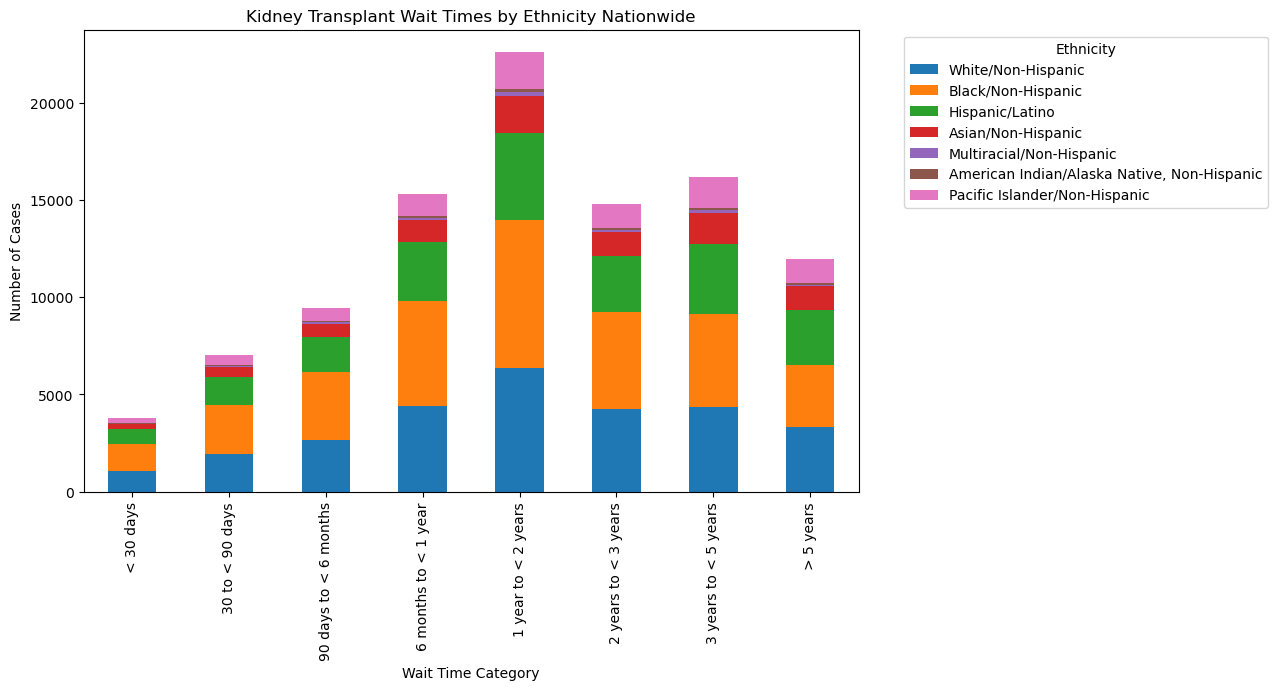

In [100]:
# Plot above on a bar chart

# Set Ethnicity as the index
ethnicity_data_for_plot = nat_ethnicity_wait.set_index("Ethnicity")

# Transpose the DataFrame for easier plotting
ethnicity_data_for_plot = ethnicity_data_for_plot.transpose()

# Plot the bar chart
ethnicity_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Ethnicity Nationwide")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Ethnicity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## By age group

In [106]:
# Total for each age group nationwide

nat_age_group_A = kidney_data.loc[kidney_data["Age"] == "< 1 Year"]["Total"].sum()
nat_age_group_B = kidney_data.loc[kidney_data["Age"] == "1-5 Years"]["Total"].sum()
nat_age_group_C = kidney_data.loc[kidney_data["Age"] == "6-10 Years"]["Total"].sum()
nat_age_group_D = kidney_data.loc[kidney_data["Age"] == "11-17 Years"]["Total"].sum()
nat_age_group_E = kidney_data.loc[kidney_data["Age"] == "18-34 Years"]["Total"].sum()
nat_age_group_F = kidney_data.loc[kidney_data["Age"] == "35-49 Years"]["Total"].sum()
nat_age_group_G = kidney_data.loc[kidney_data["Age"] == "50-64 Years"]["Total"].sum()
nat_age_group_H = kidney_data.loc[kidney_data["Age"] == "65 +"]["Total"].sum()

print(nat_age_group_A)
print(nat_age_group_B)
print(nat_age_group_C)
print(nat_age_group_D)
print(nat_age_group_E)
print(nat_age_group_F)
print(nat_age_group_G)
print(nat_age_group_H)

2
242
256
697
7113
19694
37667
23095


In [108]:
# National ethnicity totals dataframe

nat_age_totals = pd.DataFrame({"Age":["< 1 Year","1-5 Years","6-10 Years", "11-17 Years", "18-34 Years", "35-49 Years", 
                                      "50-64 Years", "65 +"], "Candidates":[nat_age_group_A, nat_age_group_B, nat_age_group_C,
                                                                            nat_age_group_D, nat_age_group_E, nat_age_group_F, 
                                                                            nat_age_group_G, nat_age_group_H]})
nat_age_totals

,Age,Candidates
0,< 1 Year,2
1,1-5 Years,242
2,6-10 Years,256
3,11-17 Years,697
4,18-34 Years,7113
5,35-49 Years,19694
6,50-64 Years,37667
7,65 +,23095


In [109]:
# Hypothesis testing

#Assuming even distribution of people amongst age groups - mean of 11095.75
# Degree of freedom is 8-1 = 7
# p-value = 0.05
# Reset index to age

nat_age_totals["Expected"] = 11095.75

nat_age_totals.set_index("Age")

critical_value = stats.chi2.ppf(q = 0.95, df = 7)
print(critical_value)

14.067140449340169


In [110]:
# Null hypothesis is that number of candidates is evenly distributed amongst age groups

stats.chisquare(nat_age_totals['Candidates'], nat_age_totals['Expected'])

Power_divergenceResult(statistic=126743.562850641, pvalue=0.0)

In [113]:
# Creating age vs wait time dataframe

nat_age_wait = pd.DataFrame(kidney_data[["Age","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
nat_age_wait

,Age,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
5,50-64 Years,10,27,64,114,193,96,73,34
9,35-49 Years,6,16,41,61,86,48,31,18
10,65 +,6,10,26,43,76,49,38,24
13,18-34 Years,3,5,11,29,25,15,7,6
21,11-17 Years,0,1,3,3,2,0,0,1
...,...,...,...,...,...,...,...,...,...
1451,65 +,3,1,2,6,4,4,4,1
1454,35-49 Years,0,3,2,3,4,1,2,0
1458,18-34 Years,0,1,0,1,3,1,1,0
1465,6-10 Years,0,0,0,0,0,1,0,0


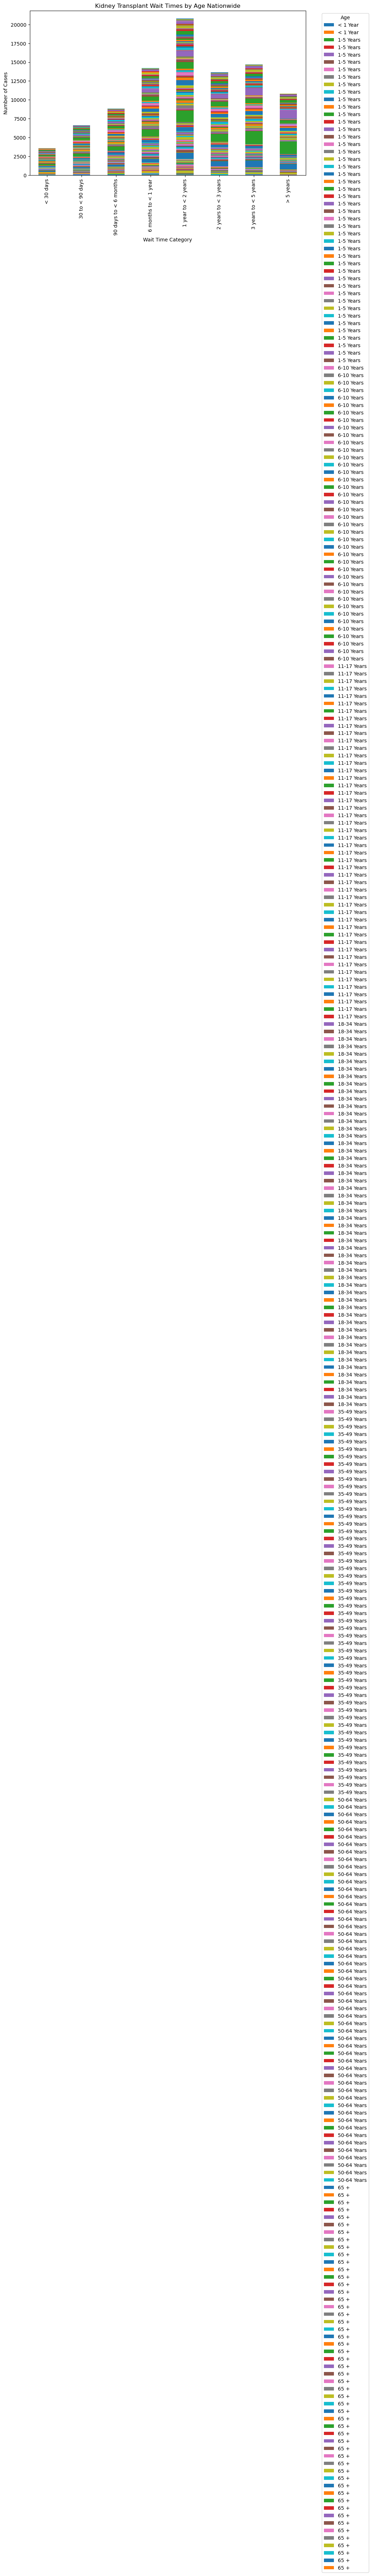

In [114]:
# Plot above on a bar chart
# Set '"Age" the index
age_data_for_plot = nat_age_wait.set_index("Age")

# Specify the desired order of ages
ordered_ages = ["< 1 Year","1-5 Years","6-10 Years", "11-17 Years", "18-34 Years", "35-49 Years", "50-64 Years", "65 +"]

# Reorder the rows based on the desired order
age_data_for_plot = age_data_for_plot.loc[ordered_ages]

# Transpose the DataFrame for easier plotting
age_data_for_plot = age_data_for_plot.transpose()

# Plot the bar chart
age_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Age Nationwide")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [66]:
#Print State Totals

state_totals.head()

,State,Total,< 30 Days,30 to < 90 Days,90 Days to < 6 Months,6 Months to < 1 Year,1 Year to < 2 Years,2 Years to < 3 Years,3 Years to < 5 Years,5 or More Years
0,Alabama,1166,25,60,148,251,383,208,149,83
1,Alaska,118,3,2,11,18,18,23,29,15
2,Arizona,1035,54,123,158,186,212,113,99,100
3,Arkansas,343,25,48,46,67,100,32,37,22
4,California,17409,454,893,1154,2188,3476,2463,3779,3699


In [67]:
#Add columns to the state Totals for Lat and Lng
state_totals ["Lat"] = ""
state_totals["Lon"] = ""
state_totals.head()

,State,Total,< 30 Days,30 to < 90 Days,90 Days to < 6 Months,6 Months to < 1 Year,1 Year to < 2 Years,2 Years to < 3 Years,3 Years to < 5 Years,5 or More Years,Lat,Lon
0,Alabama,1166,25,60,148,251,383,208,149,83,,
1,Alaska,118,3,2,11,18,18,23,29,15,,
2,Arizona,1035,54,123,158,186,212,113,99,100,,
3,Arkansas,343,25,48,46,67,100,32,37,22,,
4,California,17409,454,893,1154,2188,3476,2463,3779,3699,,


In [68]:
#Set search parameters
params = {
        "apiKey" : geoapify_key,
        "format":"json"
}
base_url = "https://api.geoapify.com/v1/geocode/search"



In [69]:
# Print a message to follow up the airport search
print("Starting state search")

# Loop through the cities_pd DataFrame and search coordinates for each city
for index, row in state_totals.iterrows():

    # Get the state's name & add ", United States of America" to the string so geoapify finds the correct city
    state = row["State"] + ", United States of America"

    # Add the current city to the parameters
    params["text"] = f"{state}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert response to JSON
    response = response.json()

    # Extract latitude and longitude
    state_totals.loc[index, "Lat"] = response["results"][0]["lat"]
    state_totals.loc[index, "Lon"] = response["results"][0]["lon"]
    
    # Log the search results
    print(f"Coordinates for {state} fetched...")

# Display sample data to confirm that the coordinates appear
state_totals.head()

Starting state search
Coordinates for Alabama, United States of America fetched...
Coordinates for Alaska, United States of America fetched...
Coordinates for Arizona, United States of America fetched...
Coordinates for Arkansas, United States of America fetched...
Coordinates for California, United States of America fetched...
Coordinates for Colorado, United States of America fetched...
Coordinates for Connecticut, United States of America fetched...
Coordinates for Delaware, United States of America fetched...
Coordinates for District of Columbia, United States of America fetched...
Coordinates for Florida, United States of America fetched...
Coordinates for Georgia, United States of America fetched...
Coordinates for Hawaii, United States of America fetched...
Coordinates for Idaho, United States of America fetched...
Coordinates for Illinois, United States of America fetched...
Coordinates for Indiana, United States of America fetched...
Coordinates for Iowa, United States of Amer

,State,Total,< 30 Days,30 to < 90 Days,90 Days to < 6 Months,6 Months to < 1 Year,1 Year to < 2 Years,2 Years to < 3 Years,3 Years to < 5 Years,5 or More Years,Lat,Lon
0,Alabama,1166,25,60,148,251,383,208,149,83,33.258882,-86.829534
1,Alaska,118,3,2,11,18,18,23,29,15,64.445961,-149.680909
2,Arizona,1035,54,123,158,186,212,113,99,100,34.395342,-111.763275
3,Arkansas,343,25,48,46,67,100,32,37,22,35.204888,-92.447911
4,California,17409,454,893,1154,2188,3476,2463,3779,3699,36.701463,-118.755997


In [70]:
%%capture --no-display

# Configure the map plot
state_map = state_totals.hvplot.points( "Lon",
                                    "Lat",
                                    geo = True,
                                    color = "State",
                                    tiles = "OSM",
                                    frame_width = 800,
                                    frame_height = 600,
                                    size = "Total",
                                    scale = 0.3,
                                    hover_cols = ["State", "Total"]
                                    )

# Display the map
state_map

#Save the image
#plt.savefig("../Resources/state_map.png")

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (State,Total)